In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [407]:
ts1=pd.read_csv("APMM12-timeseries11.csv", index_col="date", parse_dates=True)
ts1.index.freq = 'D'
ts1.head()

,value
date,
2020-01-01,-0.390259
2020-01-02,-0.383311
2020-01-03,-1.352154
2020-01-04,-1.979866
2020-01-05,-0.058961


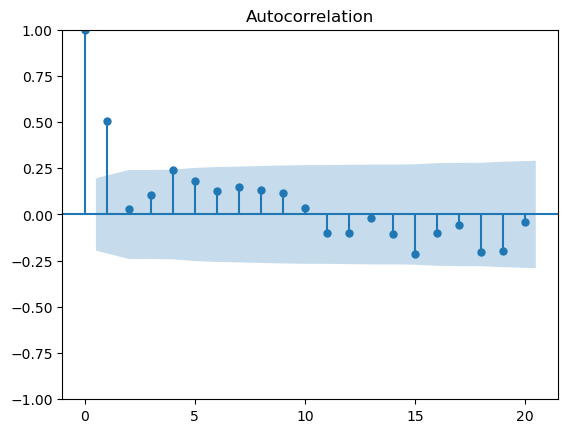

In [409]:
plot_acf(ts1,lags=20)
plt.show()

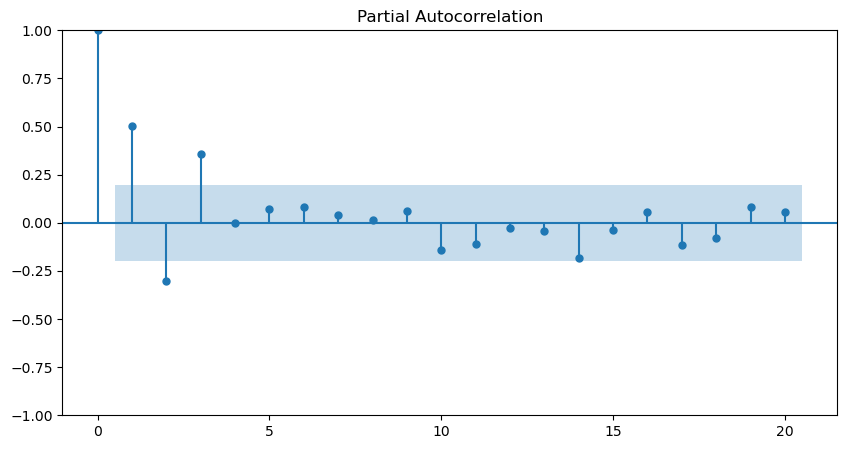

In [411]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(ts1, lags=20,ax=ax)
plt.show()

In [415]:
result = adfuller(ts1)
p = result[1]
print(f"{p:.3f}")

0.193


In [419]:
model = ARIMA(ts1, order=(0,0,1))
result= model.fit()
theta_1 = result.params['ma.L1']
print(f'{theta_1: .4f}')

 0.7251


In [421]:
ts2=pd.read_csv('APMM12-timeseries12.csv', index_col='date',parse_dates=True )
ts2.index.freq='D'
ts2.head()

,value
date,
2020-01-01,0.080929
2020-01-02,-0.400780
2020-01-03,-0.295763
2020-01-04,-1.489246
2020-01-05,-1.915809


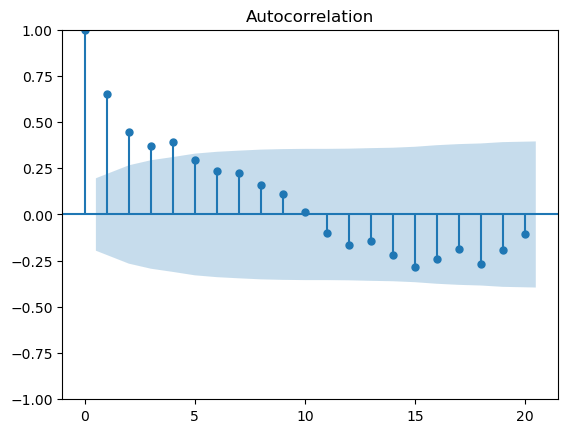

In [461]:
plot_acf(ts2, lags=20)
plt.show()

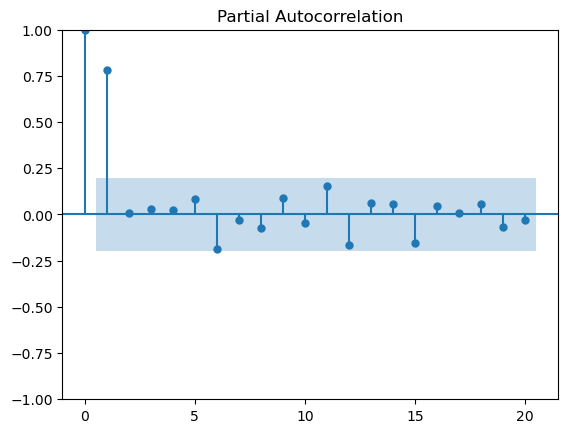

In [385]:
plot_pacf(ts2, lags=20)
plt.show()

In [427]:
result = adfuller(ts2)
p = result[1]
print(f'{p:.3f}')

0.001


In [429]:
model = ARIMA(ts2, order=(1,0,0))
result = model.fit()
phi_1 = result.params['ar.L1']

In [431]:
print(f"{phi_1:.4f}")

0.6633


In [433]:
ts3 = pd.read_csv("APMM12-timeseries14.csv", index_col='date', parse_dates=True)
ts3.index.freq='D'

In [435]:
ts3.head()

,value
date,
2020-01-01,-0.380547
2020-01-02,-1.027080
2020-01-03,-2.741463
2020-01-04,-5.821654
2020-01-05,-7.697391


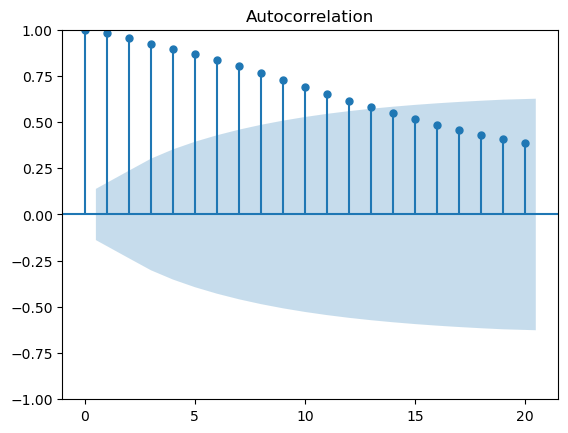

In [437]:
plot_acf(ts3, lags=20)
plt.show()

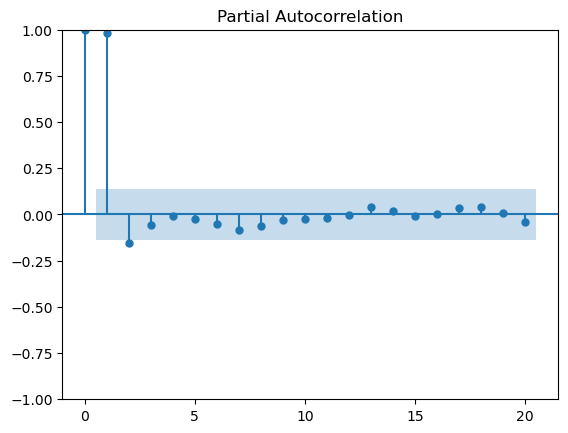

In [439]:
plot_pacf(ts3, lags=20)
plt.show()

In [441]:
result = adfuller(ts3)
p = result[1]
print(f'{p:.4f}')

0.3796


In [443]:
ts_diff = ts3.diff().dropna()

# Step 4: ADF test
result = adfuller(ts_diff)
p_value = result[1]

In [445]:
print(f'{p_value:.3f}')

0.004


In [449]:
train_size = int(len(ts3) * 0.75)
train, test = ts3[:train_size], ts[train_size:]

# Step 5: Fit ARIMA(1,1,1) model
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

# Step 6: Print AR (phi 1) coefficient
phi_1 = fitted_model.params['ar.L1']
print(f"{phi_1:.3f}")

0.664


In [455]:
theta_1 = fitted_model.params['ma.L1']

In [457]:
print(f"{theta_1:.3f}")

0.854


In [459]:
# Step 1: Load the dataset correctly
ts04 = pd.read_csv("APMM12-timeseries14.csv", index_col="date", parse_dates=True)

# Step 2: Set daily frequency
ts04.index.freq = 'D'

# Step 3: Train-test split (75–25)
n = int(len(ts04) * 0.75)
train, test = ts04.iloc[:n], ts04.iloc[n:]

# Step 4: Fit ARIMA(1,1,1)
model = ARIMA(train, order=(1,1,1))
res = model.fit()

# Step 5: Forecast
forecast = res.forecast(steps=len(test))

# Step 6: Compute RMSE
mse = np.mean((forecast.values - test.values)**2)
rmse = np.sqrt(mse)

# Output first 3 decimal points (no rounding)
print(f"RMSE: {(rmse):.4f}")

RMSE: 9.2221
